In [ ]:
import os
from icecream import ic
import numpy as np
import tensorflow as tf
import keras

# ic is the "right printer for debugging"
ic ("TF Version   ", tf.__version__)
ic ("TF Path      ", tf.__path__[0])
ic ("Keras version ", keras.__version__)
ic ("numpy version ", np.__version__)
ic("This is ic")
ic("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
ic| 'TF Version   ', tf.__version__: '2.16.2'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.8.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1


('Num GPUs Available: ', 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## 1. Load CIFAR-10 dataset 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 237s 1us/step


In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
batch_size = 128

In [ ]:
def resize_image(image, image_height=224, image_width=224):
    ##resize images to the appropriate dimensions for AlexNet
    ## param image_width
    ## param image_height 
    ## param image image to resize
    ## return  resized image
    
    return cv2.resize(image, (image_height, image_width))

## Preprosesing the images
def preprocess_image(image, label):
  
    # preprocessing function used in test dataset pipeline

  image = image / 255
  image = resize_image(image)

  # label sparse to categorical
  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

2025-03-01 19:00:12.278936: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-01 19:00:12.279022: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-01 19:00:12.279026: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-01 19:00:12.279235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-01 19:00:12.279266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2025-03-01 19:04:30.026810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


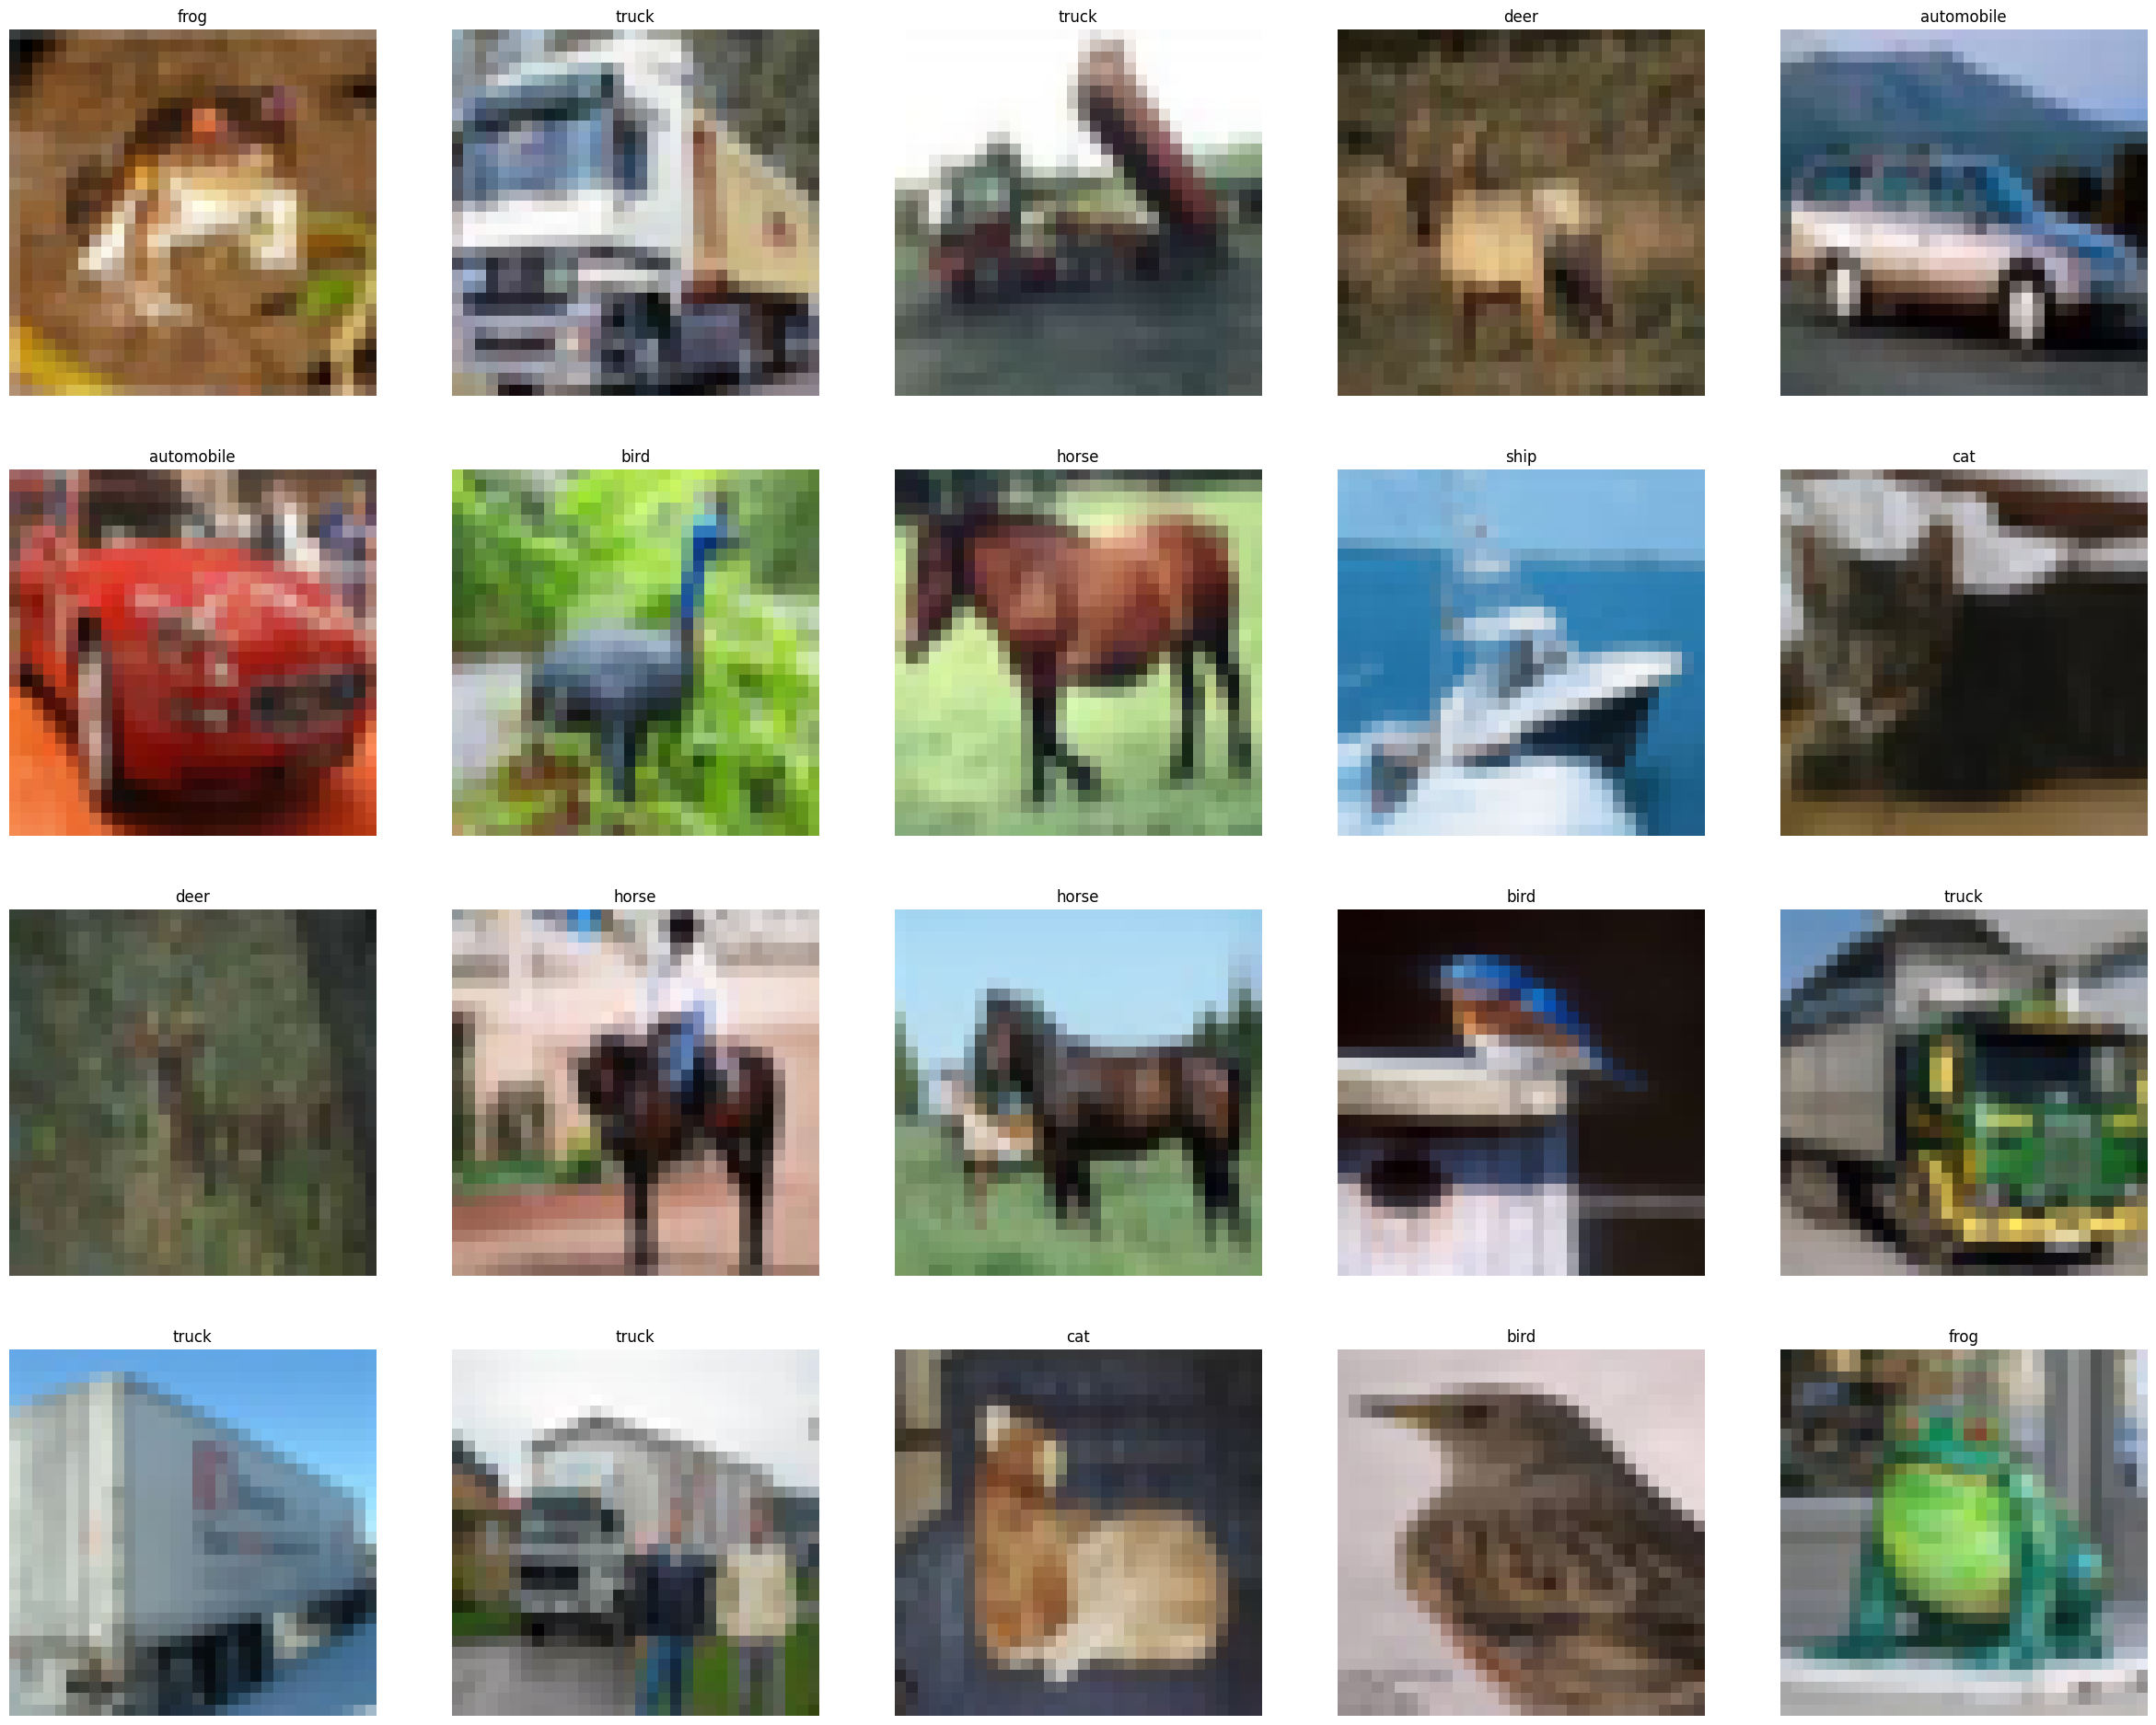

In [ ]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()

print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [ ]:
print("Images Raw:")
print("Shape of train images: {}".format(train_images.shape))
print("Shape of train labels: {}".format(train_labels.shape))
print("Shape of test images: {}".format(test_images.shape))
print("Shape of test labels: {}".format(test_labels.shape))
print("Data type: ", train_images.dtype)

Images Raw:
Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Data type:  uint8


In [ ]:
print("TF Dataset: ")
for image, label in train_ds:
  print(image.shape)
  print(label.shape)
  break

TF Dataset: 
(32, 32, 3)
(1,)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds  = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [ ]:
def resize_image(image, image_height=224, image_width=224):
    ##resize images to the appropriate dimensions for AlexNet
    ## param image_width
    ## param image_height 
    ## param image image to resize
    ## return  resized image
    
    return tf.image.resize(image, [image_height, image_width])

In [ ]:
test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds = (
    test_ds
    .map(preprocess_image)#, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    #.shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

In [ ]:
test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

## Test set
test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

In [ ]:
print("TF Dataset: ")
for image, label in train_ds:
  print(image.shape)
  print(label.shape)
  break

TF Dataset: 
(128, 224, 224, 3)
(128, 10)


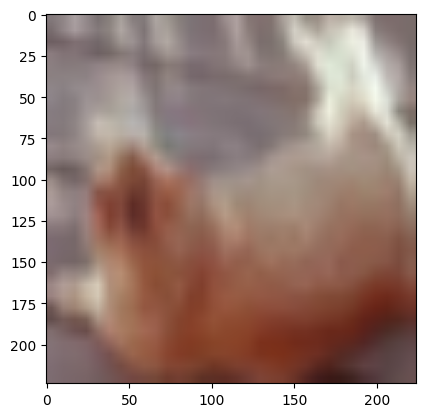

In [ ]:
sample_ds = train_ds.shuffle(10).take(1).as_numpy_iterator()
it = iter(sample_ds)
fig, axes = plt.subplots()
axes = plt.imshow(it.next()[0][0])
plt.show()

## DO NOT Run AlexNet from scratch (heavy model) alexNet_model function 
Do not run unless you have 4hr to spare in waiting for the model finish running 

ic| 'TF Version   ', tf.__version__: '2.16.2'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.8.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1
2025-03-03 16:26:51.597944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train size: 50000
Test size: 10000
Images Raw info:
Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Data type:  uint8
TF Dataset: 
(128, 224, 224, 3)
(128, 10)


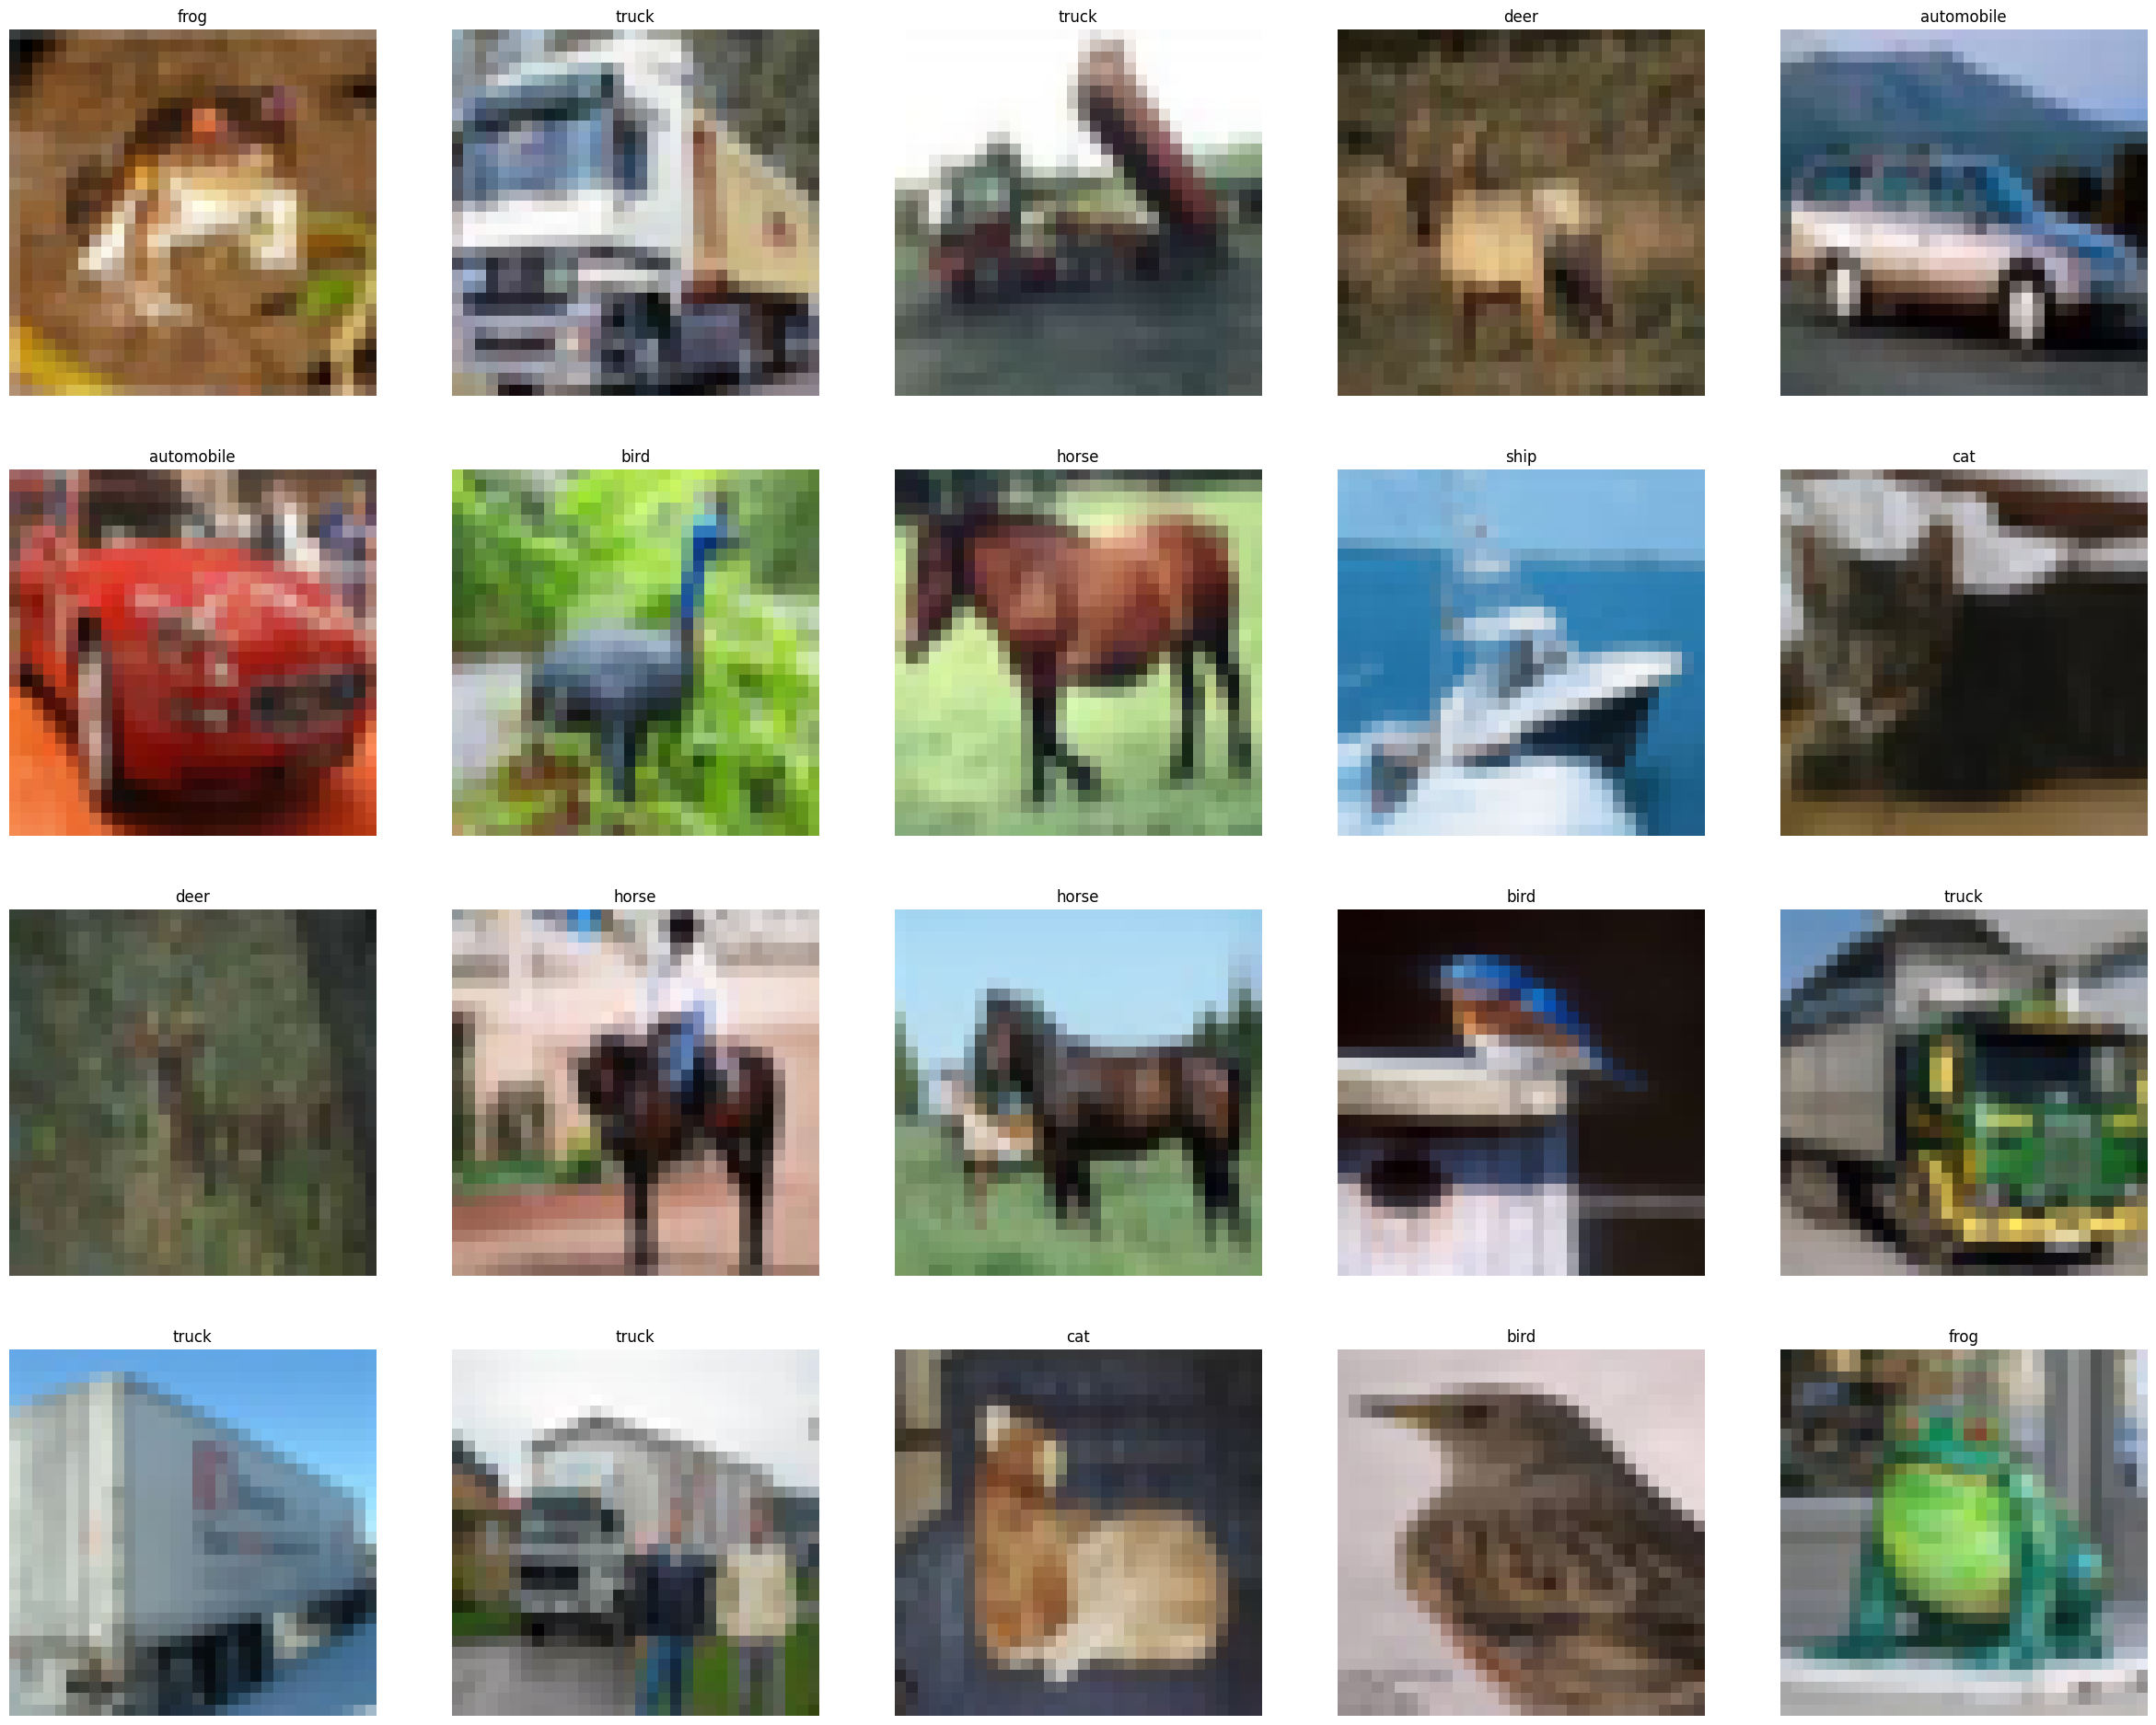

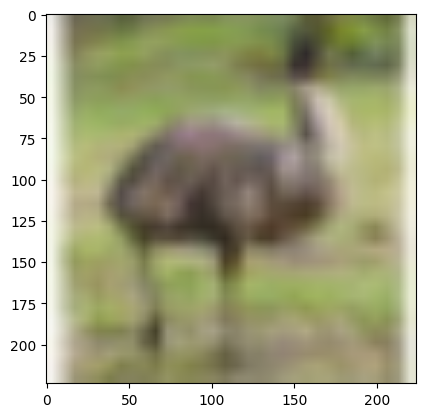

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 96)   │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 55, 55, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 27, 27, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 27, 27, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 27, 27, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │   177,213,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1000)           │     1,001,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,839,952 (773.77 MB)

 Trainable params: 202,839,952 (773.77 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 96)   │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 55, 55, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 27, 27, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 27, 27, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 27, 27, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │   177,213,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,848,962 (769.99 MB)

 Trainable params: 201,848,962 (769.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.1746 - loss: 2.2440 - val_accuracy: 0.3772 - val_loss: 1.7561
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.4270 - loss: 1.5851 - val_accuracy: 0.5359 - val_loss: 1.2830
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 840s 2s/step - accuracy: 0.5661 - loss: 1.2165 - val_accuracy: 0.6180 - val_loss: 1.1229
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - accuracy: 0.6548 - loss: 0.9810 - val_accuracy: 0.6909 - val_loss: 0.8885
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1026s 3s/step - accuracy: 0.7085 - loss: 0.8213 - val_accuracy: 0.7007 - val_loss: 0.8590
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1599s 5s/step - accuracy: 0.7578 - loss: 0.6948 - val_accuracy: 0.6881 - val_loss: 0.8983
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 979s 3s/step - accuracy: 0.8003 - loss: 0.5719 - val_accuracy: 0.7063 - val_loss: 0.9149
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1021s 3s/step - accuracy: 0.8358 - loss: 0.4636 - val_a

In [ ]:
import os
from  icecream import ic
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Check the initial configuration 
# ic is the "right printer for debugging"
ic ("TF Version   ", tf.__version__)
ic ("TF Path      ", tf.__path__[0])
ic ("Keras version ", keras.__version__)
ic ("numpy version ", np.__version__)
ic("This is ic")
ic("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## 1. Load CIFAR-10 dataset 
## The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
## The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. 
## The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 
## Between them, the training batches contain exactly 5000 images from each class.

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Training configuration 
batch_size = 128

## Preprosesing 
## We'll need to define some functions to be able to preproses the data and ensure the data utilized
## is within the appropiate format for our model and use case. 


## Function to resize the image as AlexNet model expects 224x224 images
def resize_image(image, image_height=224, image_width=224):
    ##resize images to the appropriate dimensions for AlexNet
    ## param image_width
    ## param image_height 
    ## param image image to resize
    ## return  resized image
    
    return tf.image.resize(image, [image_height, image_width])

#cv2.resize(image, (image_height, image_width))

## Preprosesing the images
def preprocess_image(image, label):
  
    # preprocessing function used in test dataset pipeline

  image = image / 255
  image = resize_image(image)

  # label sparse to categorical
  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)

## Create test , validation and training sets 

## Tensorflow gas skme methods and procedures to transform the dataset into a data representation TF can work with.
## Let's use tf.data.Dataset.from_tensor_slices , this method takes the train, test, and validation dataset partitions
## and returns a corresponding TensorFlow Dataset representation.
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds  = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

## Let's take a look on the images, as defined above we'll need to prepocess the data from CIFAR-10
## to a format AlexNet can work with

plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

## Check the size for the training and testing dataset
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size  = tf.data.experimental.cardinality(test_ds).numpy()

print('Train size:',train_ds_size)  ##  50000
print('Test size:',test_ds_size)    ##  10000

## Let's also get the some info about the data 

print("Images Raw info:")
print("Shape of train images: {}".format(train_images.shape))
print("Shape of train labels: {}".format(train_labels.shape))
print("Shape of test images: {}".format(test_images.shape))
print("Shape of test labels: {}".format(test_labels.shape))
print("Data type: ", train_images.dtype)


## Data Pipeline
## We will build an input for the data pipeline for our model, an input / data pipeline is a series of functions
## or methods that are called consecutively , are a chain of functions that enforce an operation of the data 
## flowing through the pipeline , so far we have created the functions to preprocess the data (1) but we also 
## need to to suffle the dataset (2) and batch the data within the dataset (3)

## Let's define the test, validation and training set 

##
split = int(0.1 * len(train_images)) # split 10% to validation
valid_images = train_images[:split]
train_images = train_images[split:]

valid_labels = train_labels[:split]
train_labels = train_labels[split:]


## Training set
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

## Test set
test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

##  Validation set
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
valid_ds = (
    valid_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .batch(batch_size,drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

## Show Size of TF Dataset
print("TF Dataset: ")
for image, label in train_ds:
  print(image.shape)
  print(label.shape)
  break

## Show a random image 
sample_ds = train_ds.shuffle(10).take(1).as_numpy_iterator()
it = iter(sample_ds)
fig, axes = plt.subplots()
axes = plt.imshow(it.next()[0][0])
plt.show()

## Architecture of AlexNet model  

def alexNet_model(image_height=224, image_width=224, class_count=1000):

    model = keras.models.Sequential()

    ## layer 1 Conv - "filters the 224 x 224 x 3 input image with 96 kernels
    #           of size 11 x 11 x 3 with a stride of 4 pixels"
    model.add(keras.layers.Conv2D(filters=96,
                                  kernel_size=(11, 11),
                                  strides=2, # 4 as the original value
                                  input_shape=(image_height, image_width, 3),
                                  activation="relu",
                                  padding="same"))
    #model.add(keras.layers.BatchNormalization())

    ## layer 1 MaxPool - 3x3 MaxPool layer stride 2 
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # layer 2 Conv- "256 kernels of size 5 x 5 x 48"
    model.add(keras.layers.Conv2D(filters=256,
                                  kernel_size=(5, 5),
                                  activation="relu",
                                  padding="same"))
    #model.add(keras.layers.BatchNormalization())

    ## layer 2 MaxPool -  3x3 MaxPool layer stride 2 
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # layer 3 Conv - "384 kernels of size 3 x 3 x 256"
    model.add(keras.layers.Conv2D(filters=384,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
       
    # layer 4 Conv - "384 kernels of size 3 x 3 x 192"
    model.add(keras.layers.Conv2D(filters=384,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
    
    # layer 5 Conv - "256 kernels of size 3 x 3 x 192"
    model.add(keras.layers.Conv2D(filters=256,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
    
    ## layer 3 MaxPool - 3x3 MaxPool layer stride 2 
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # flatten before feeding into FC layers
    model.add(keras.layers.Flatten())

    # fully connected layers
    # "The fully-connected layers have 4096 neurons each."
    # "We use dropout in the first two fully-connected layers..."
    model.add(keras.layers.Dense(units=4096))  # layer 1 Dense
    #model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(units=4096))  # layer 2 Dense 
    #model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(units=1000))  # layer 3 Dense , units=class_count = 1000

    # output layer is softmax
    model.add(keras.layers.Dense(units=class_count,activation='softmax')) 
    ## model.add(keras.layers.Activation('softmax'))
    
    return model

model = alexNet_model(image_height=224, image_width=224, class_count=1000)

model.summary()


def train(epochs=20):

  ##train AlexNet model 

  model = alexNet_model(class_count=10)
  # display model info
  model.build((None, 224, 224, 3))
  model.summary()

  init_lr = 0.01
  decay_steps = 10000
  decay_rate = 0.96
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_lr, decay_steps=decay_steps, decay_rate=decay_rate)

  optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(
      x=train_ds,
      validation_data=valid_ds,
      epochs=epochs,
  )
  return history, model

# Train networks
history, model = train(epochs=20)

In [ ]:
model.evaluate(
    test_ds
)

351/351 ━━━━━━━━━━━━━━━━━━━━ 137s 379ms/step - accuracy: 0.9738 - loss: 0.0753


[0.06679382920265198, 0.9774082899093628]

<ipython-input-6-07606b5d20fe>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
<ipython-input-6-07606b5d20fe>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')


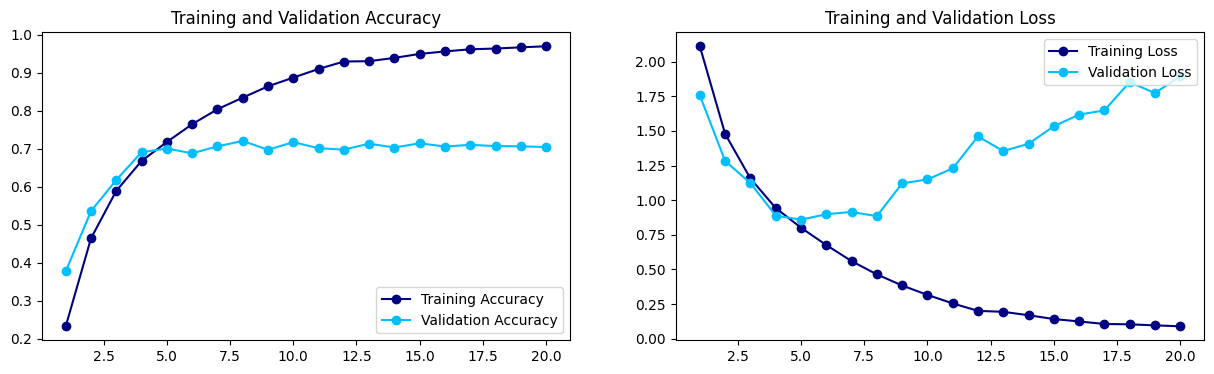

In [ ]:
##Plotting the results
epochs = 20

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('TrainingAlexNet_30epoch_128Batch.jpg')

plt.show()

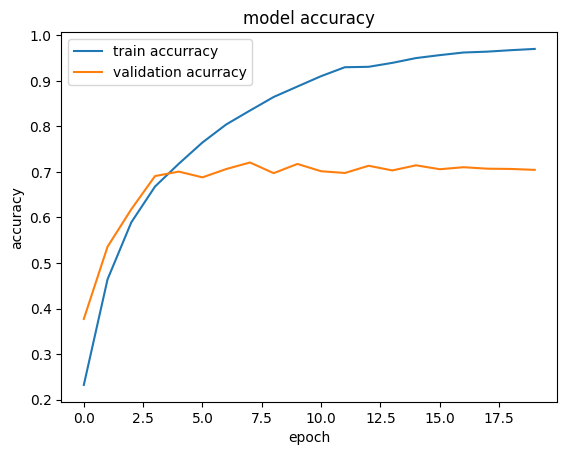

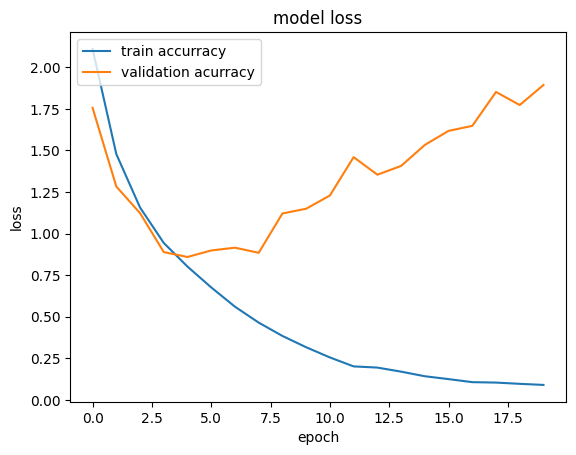

In [ ]:
# Plot accuracy -> epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accurracy', 'validation acurracy'], loc='upper left')
plt.savefig('TrainingAlexNet_30epoch_128Batch_acurracy.jpg')
plt.show()


# Plot loss -> epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.legend(['train accurracy', 'validation acurracy'], loc='upper left')
plt.savefig('TrainingAlexNet_30epoch_128Batch_loss.jpg')
plt.show()

In [ ]:
pwd()

'/Users/carolinabernal/Documents/DiplomadoExercises/alexnet/BernalRodriguez_Carolina'

<ipython-input-10-df33a62d5537>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
<ipython-input-10-df33a62d5537>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')


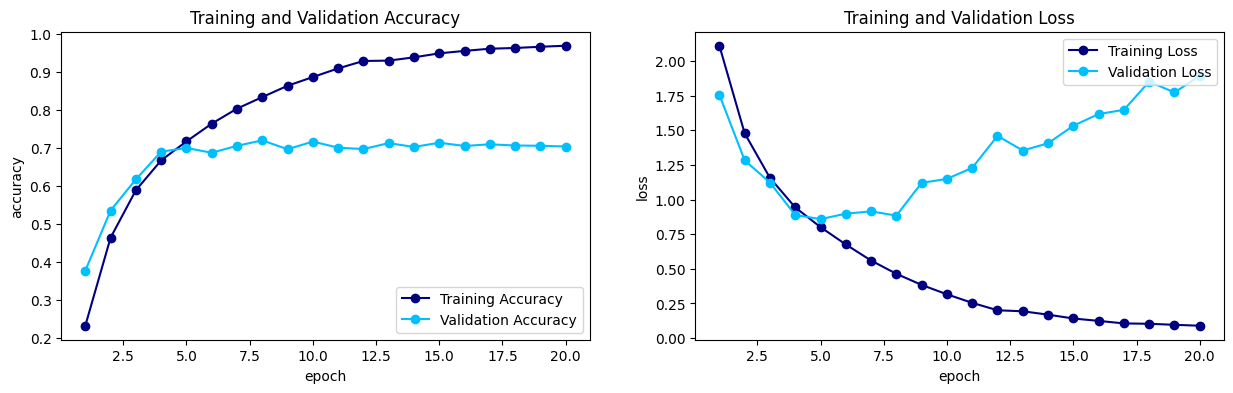

In [ ]:
##Plotting the results
epochs = 20

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
plt.savefig('TrainingAlexNet_30epoch_128Batch.jpg')

plt.show()

## AlexNet in Keras with model architecture fix and using Data Augmentation (Fixed and Corrected safe to run)

In [ ]:
def build_AlexNet(image_height=224, image_width=224, class_count=1000):

    model = keras.models.Sequential()

    # layer 1 - "filters the 224 x 224 x 3 input image with 96 kernels
    #           of size 11 x 11 x 3 with a stride of 4 pixels"
    model.add(keras.layers.Conv2D(filters=96,
                                  kernel_size=(11, 11),
                                  strides=4,
                                  input_shape=(image_height, image_width, 3),
                                  activation="relu",
                                  padding="same"))
    #model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # layer 2 - "256 kernels of size 5 x 5 x 48"
    model.add(keras.layers.Conv2D(filters=256,
                                  kernel_size=(5, 5),
                                  activation="relu",
                                  padding="same"))
    #model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # layer 3 - "384 kernels of size 3 x 3 x 256"
    model.add(keras.layers.Conv2D(filters=384,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
    # layer 4 - "384 kernels of size 3 x 3 x 192"
    model.add(keras.layers.Conv2D(filters=384,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
    # layer 5 - "256 kernels of size 3 x 3 x 192"
    model.add(keras.layers.Conv2D(filters=256,
                                  kernel_size=(3, 3),
                                  activation="relu",
                                  padding="same"))
    model.add(keras.layers.MaxPool2D(pool_size=(3, 3),
                                     strides=(2, 2)))

    # flatten before feeding into FC layers
    model.add(keras.layers.Flatten())

    # fully connected layers
    # "The fully-connected layers have 4096 neurons each."
    # "We use dropout in the first two fully-connected layers..."
    model.add(keras.layers.Dense(units=4096))  # layer 6
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(units=4096))  # layer 7
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(units=class_count))  # layer 8 ## Class corection to 10 classes and delete 1000, add Dropout as well 

    # output layer is softmax
    model.add(keras.layers.Activation('softmax'))
    return model


## Function to include data Augmentation
def data_augmentation(image, label):
## Data aumenttion function for our model 

  image = image / 255
  image = tf.image.resize(image, [256, 256])
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_crop(image, [224, 224, 3])

  # label sparse to categorical
  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)


## Let's create again our training dataset with data aumentation

## Training set with data augmentation
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

In [ ]:
def train_model(epochs=20):

  ##train AlexNet model 

  model = build_AlexNet(class_count=10)
  # display model info
  model.build((None, 224, 224, 3))
  model.summary()

  init_lr = 0.01
  decay_steps = 10000
  decay_rate = 0.96
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_lr, decay_steps=decay_steps
                                                               , decay_rate=decay_rate)

  optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(
      x=train_ds,
      validation_data=valid_ds,
      epochs=epochs,
  )
  return history, model

# Train model
history, model = train_model(epochs=15)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 389ms/step - accuracy: 0.1649 - loss: 2.2128 - val_accuracy: 0.3846 - val_loss: 1.6771
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 138s 392ms/step - accuracy: 0.3944 - loss: 1.6316 - val_accuracy: 0.5216 - val_loss: 1.3555
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 295s 841ms/step - accuracy: 0.5063 - loss: 1.3599 - val_accuracy: 0.5571 - val_loss: 1.2111
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 291s 825ms/step - accuracy: 0.5665 - loss: 1.2090 - val_accuracy: 0.6244 - val_loss: 1.0728
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 137s 390ms/step - accuracy: 0.6277 - loss: 1.0518 - val_accuracy: 0.6847 - val_loss: 0.8925
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 139s 391ms/step - accuracy: 0.6729 - loss: 0.9429 - val_accuracy: 0.7041 - val_loss: 0.8569
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 230s 654ms/step - accuracy: 0.6984 - loss: 0.8622 - val_accuracy: 0.7522 - val_loss: 0.7241
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 138s 390ms/step - accuracy: 0.7339 -

In [ ]:
model.evaluate(
    test_ds
)

351/351 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.8346 - loss: 0.4717


[0.4537484347820282, 0.8431712985038757]

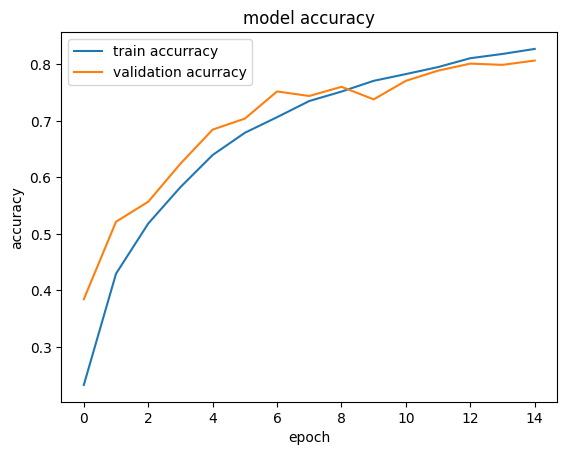

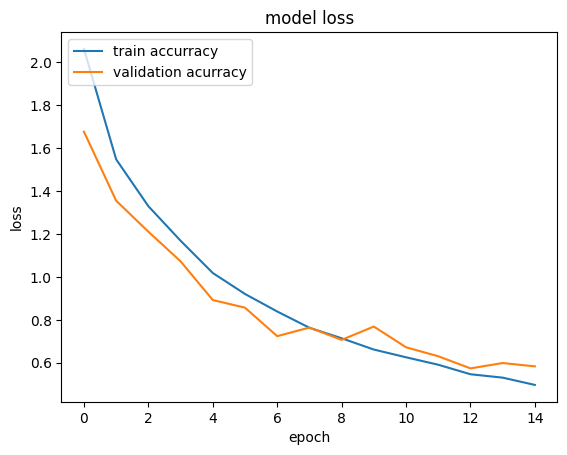

In [ ]:
# Plot accuracy -> epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accurracy', 'validation acurracy'], loc='upper left')
plt.savefig('TrainingAlexNetAug_15epoch_128Batch_acurracy.jpg')
plt.show()


# Plot loss -> epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.legend(['train accurracy', 'validation acurracy'], loc='upper left')
plt.savefig('TrainingAlexNetAug_15epoch_128Batch_loss.jpg')
plt.show()

<ipython-input-18-a6a8f6e2e358>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
<ipython-input-18-a6a8f6e2e358>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')


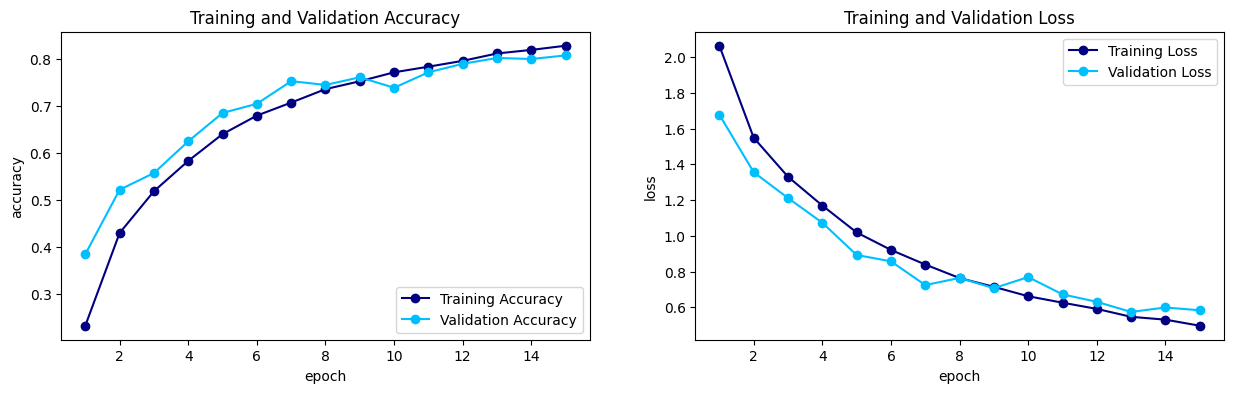

In [ ]:
##Plotting the results
epochs = 15

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-bo', label='Training Accuracy', color = 'navy')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-bo', label='Training Loss', color = 'navy')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
plt.savefig('TrainingAlexNetAug_15epoch_128Batch.jpg')

plt.show()

In [ ]:
model.save('AlexNetAug_15epochs_128Batch.keras')

In [ ]:
alexNet_model_trained = tf.keras.models.load_model('AlexNetAug_15epochs_128Batch.keras')

In [ ]:
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.axis('off')

def visualize_model(model, dataloader, class_names, num_images=6):
    images_so_far = 0
    fig = plt.figure(figsize=(10, 5))

    for images, labels in dataloader:
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)  # Obtener la clase con mayor probabilidad

        for j in range(images.shape[0]):
            if images_so_far >= num_images:
                return
            
            ax = plt.subplot(num_images // 2, 2, images_so_far + 1)
            ax.axis('off')
            ax.set_title(f'Predicted: {class_names[preds[j]]}')
            imshow(images[j])

            images_so_far += 1

In [ ]:
dataloader =  valid_ds

In [ ]:
def imshow(img):
    img = img.numpy()
    plt.imshow(img)
    plt.axis('off')

def visualize_model(model, dataloader, class_names, num_images=6):
    images_so_far = 0
    fig = plt.figure(figsize=(10, 5))

    for images, labels in dataloader:
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)  # Classes with highest probability

        for j in range(images.shape[0]):
            if images_so_far >= num_images:
                return
            
            ax = plt.subplot(num_images // 2, 2, images_so_far + 1)
            ax.axis('off')
            ax.set_title(f'Predicted: {class_names[preds[j]]}')
            imshow(images[j])

            images_so_far += 1

alexNet_model_trained = tf.keras.models.load_model('AlexNetAug_15epochs_128Batch.keras') 
dataloader =  valid_ds

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


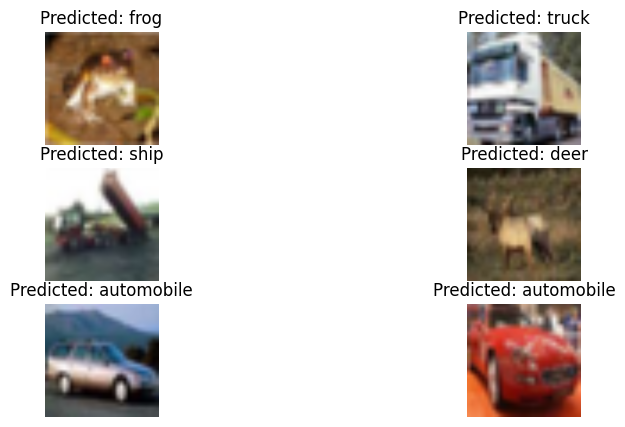

In [ ]:
visualize_model(alexNet_model_trained, dataloader, class_names, num_images=6)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


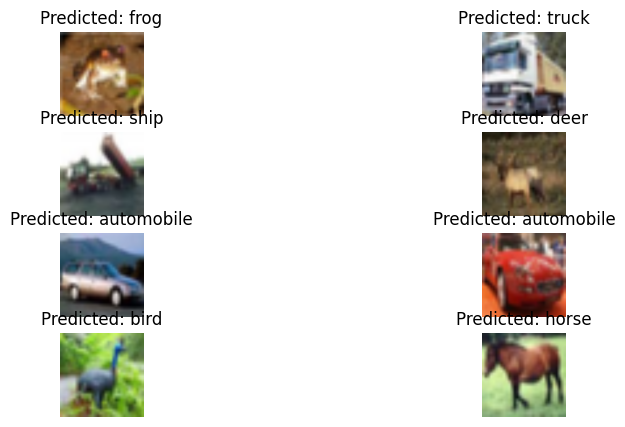

In [ ]:
visualize_model(alexNet_model_trained, dataloader, class_names, num_images=8)

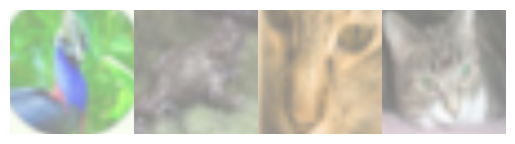

In [ ]:
def imageshow(image):
    # Normalize the image (back to [0,1] range if it was [-1,1])
    image = (image + 1) / 2
    npimage = image.numpy()
    
    # (H, W, C) format in TF 
    plt.imshow(npimage)
    plt.axis('off')
    plt.show()

# train_ds images
num_images = 4

for images, labels in train_ds.take(1):  # 1 Batch selection
    images = images[:num_images]  # Select the first num_images 
    break  # break after the 1st batch

# Concat the images on the grid horizontally 
grid_image = tf.concat([images[i] for i in range(num_images)], axis=1)  

# Show image
imageshow(grid_image)

In [ ]:
# One-Hot encoded labels to int 
label_indices = tf.argmax(labels, axis=1).numpy()

# Show the labels
print(' ' + ' || '.join(class_names[label_indices[j]] for j in range(num_images)))

 bird || frog || cat || cat
